## Task 1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import glob

import warnings

warnings.filterwarnings("ignore")

In [3]:
# Define the path to the directory containing the CSV files
path = "data/raw/"

# Use glob to get all CSV file paths
all_files = glob.glob(path + "/*.csv")

# Initialize an empty list to store DataFrames
dataframes = []

# Iterate through each file, read it, and append it to the list
for file in all_files:
    df = pd.read_csv(file, index_col=None, header=0)
    dataframes.append(df)

# Concatenate all the DataFrames into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)

# Display basic information about the merged DataFrame
print("Merged Data Shape:", df.shape)
print("First few rows of the merged data:")
display(df.head())

Merged Data Shape: (420768, 18)
First few rows of the merged data:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [4]:
# save merged data
df.to_csv('data/processed/merged_data.csv', index= False)

## Task 2


### Fundamental Data Understanding


In [5]:
# shape of the data
print("Number of rows in the dataset:", df.shape[0])
print("Number of columns in the dataset:", df.shape[1])

Number of rows in the dataset: 420768
Number of columns in the dataset: 18


In [6]:
# columns in the dataset
print("Columns in the dataset:")
print(df.columns)

Columns in the dataset:
Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')


In [7]:
# data types of the columns
print("Data types of the columns:")
print(df.dtypes)

Data types of the columns:
No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


In [8]:
# missing values in the dataset
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


### Data Preprocessing


In [9]:
# handling missing values
# - Drop columns with more than 50% missing values
missing_threshold = 0.5
columns_to_drop = df.columns[df.isnull().mean() > missing_threshold]
df = df.drop(columns=columns_to_drop)
print(f"Dropped columns with >50% missing values: {list(columns_to_drop)}")

Dropped columns with >50% missing values: []


In [10]:
# - Impute missing values for numerical columns with the mean
for column in df.select_dtypes(include=["float64", "int64"]).columns:
    df[column].fillna(df[column].mean(), inplace=True)

In [11]:
# - Impute missing values for categorical columns with the mode
for column in df.select_dtypes(include=["object"]).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [12]:
# Check missing values in the dataset after handling
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


In [13]:
# Remove duplicate entries
initial_rows = df.shape[0]
df = df.drop_duplicates()
print(f"Number of duplicates removed: {initial_rows - df.shape[0]}")

Number of duplicates removed: 0


In [14]:
df.to_csv("data/processed/preprocessed_data.csv", index=False)

### Statistical Analysis and Visualisation


#### Univariate Analysis


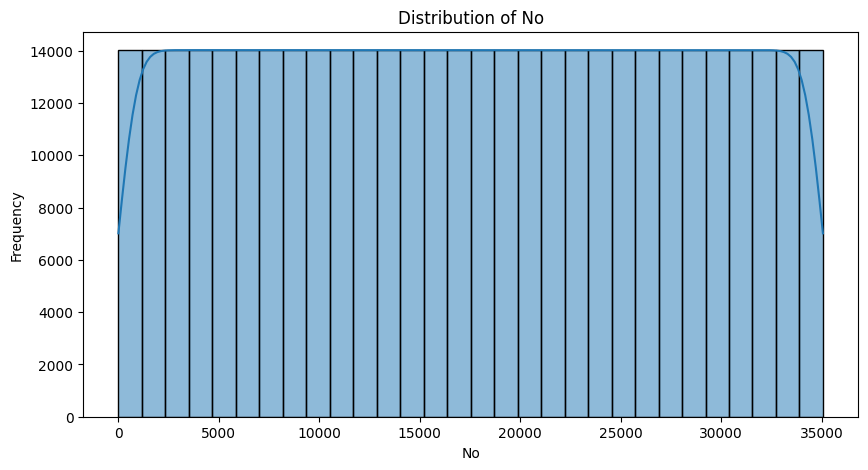

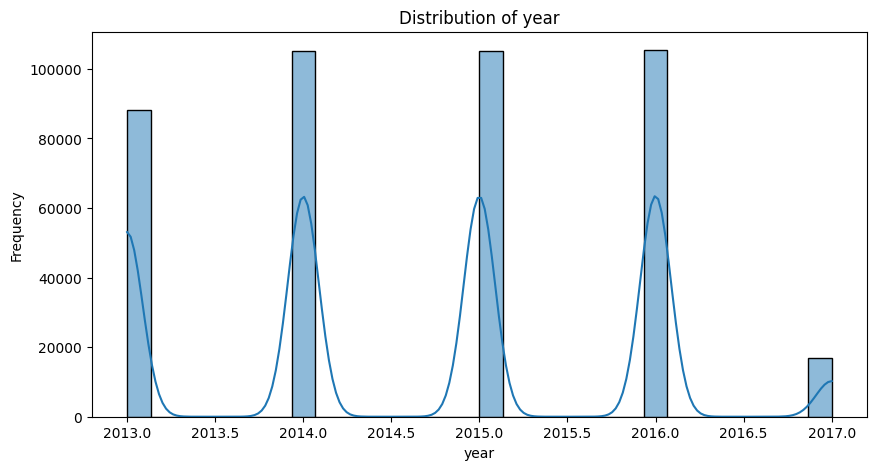

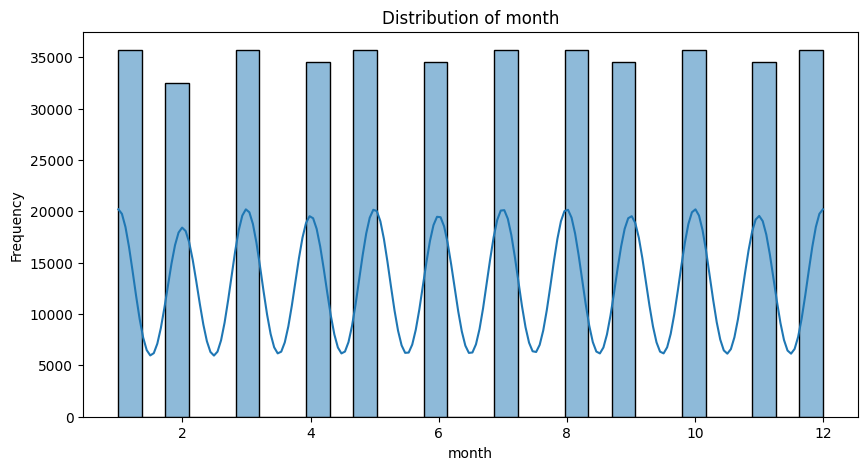

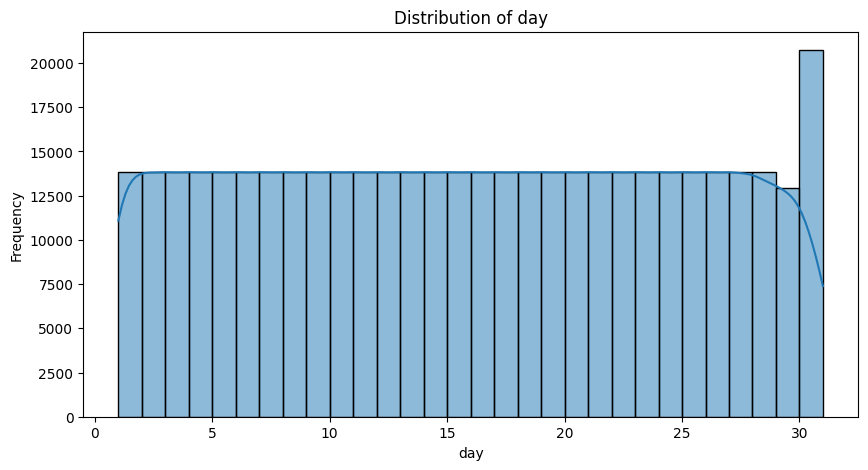

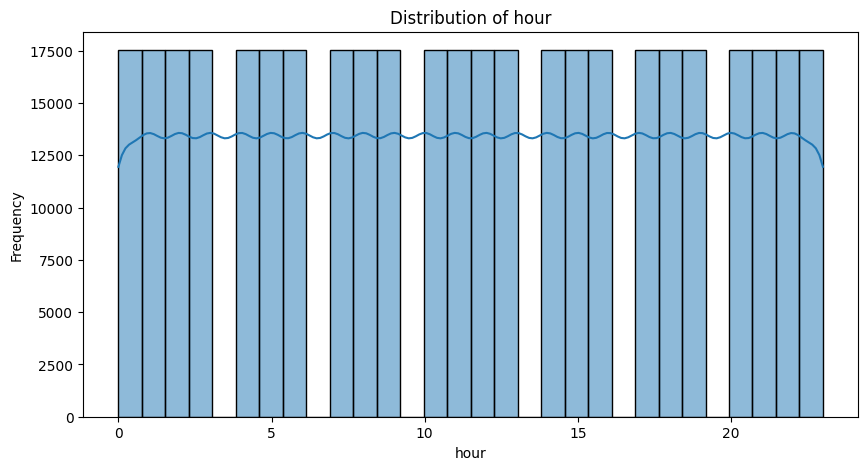

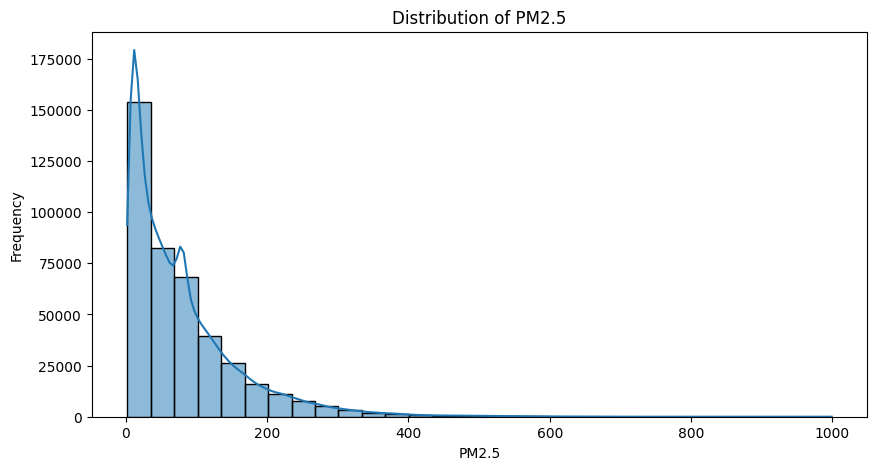

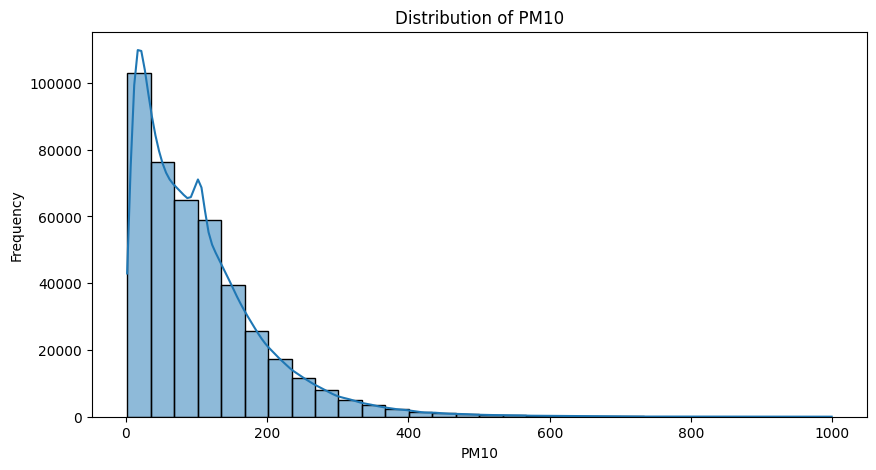

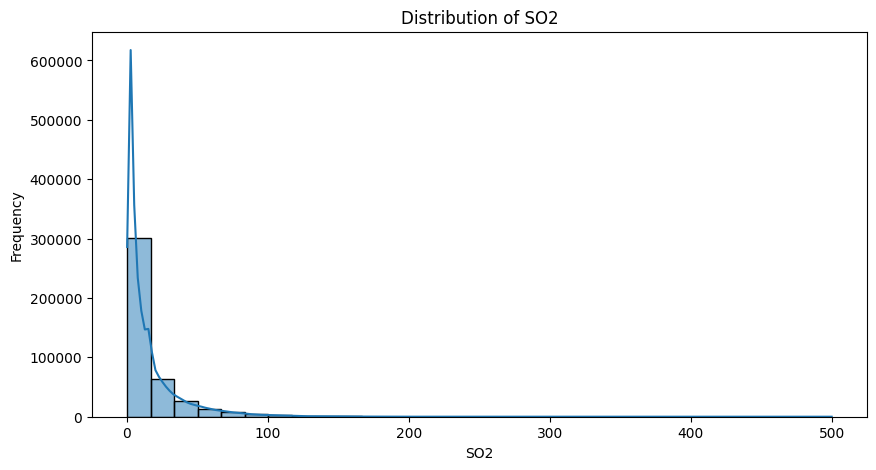

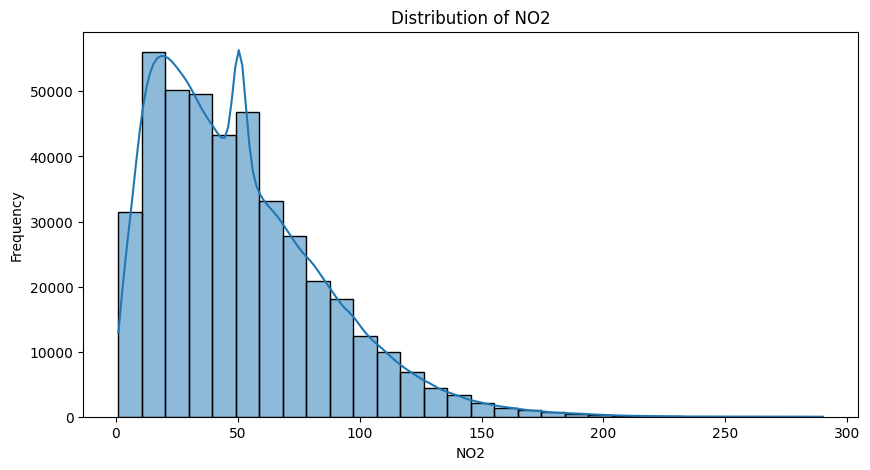

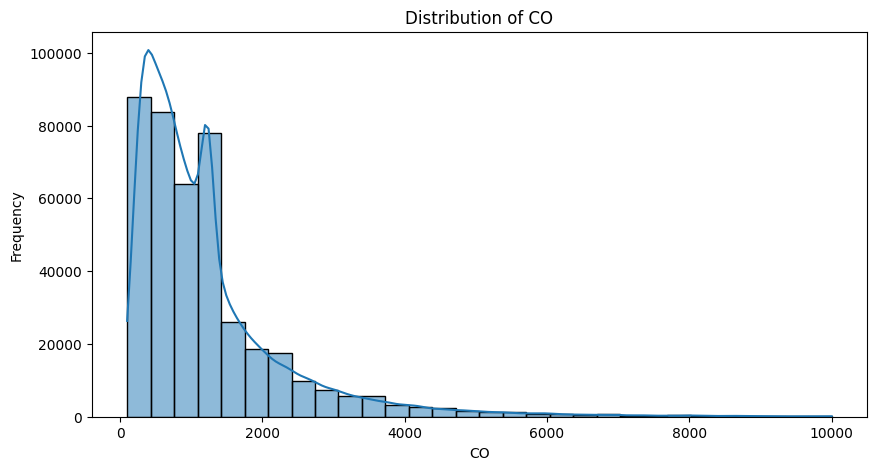

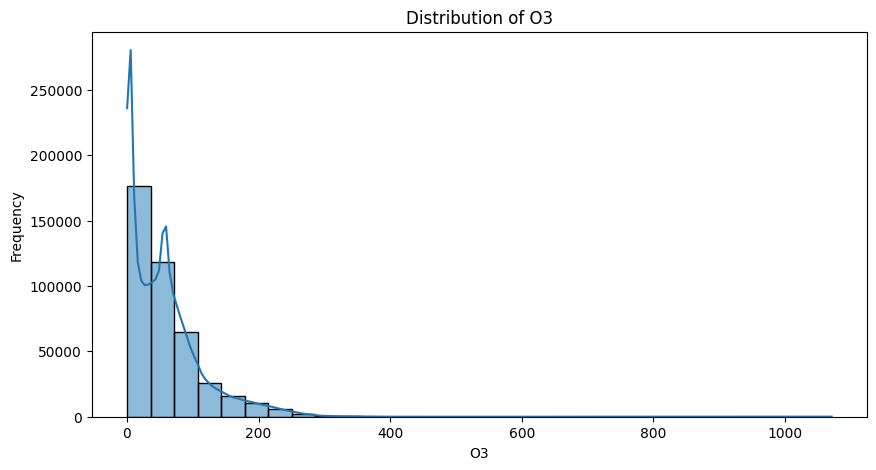

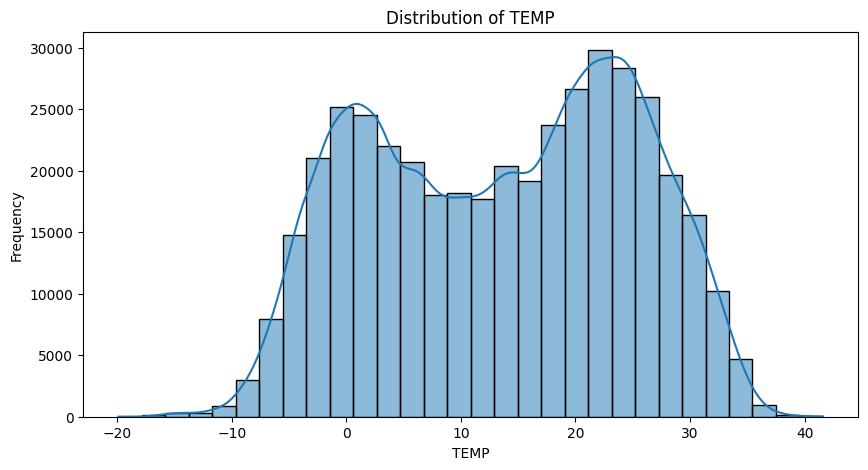

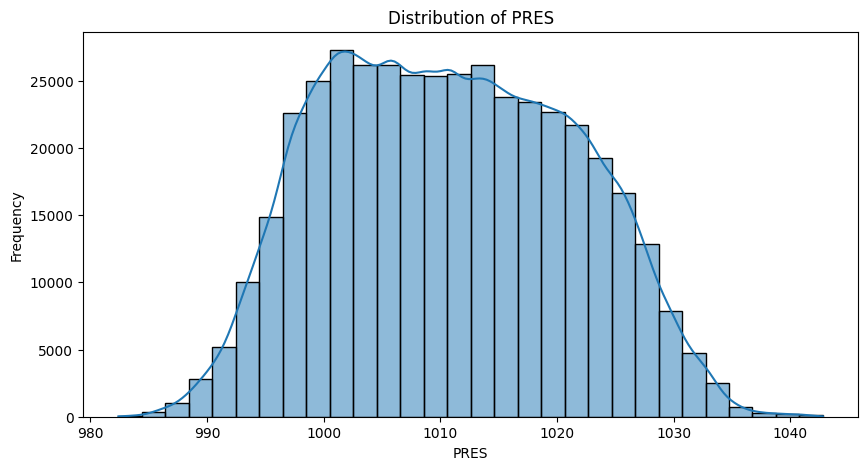

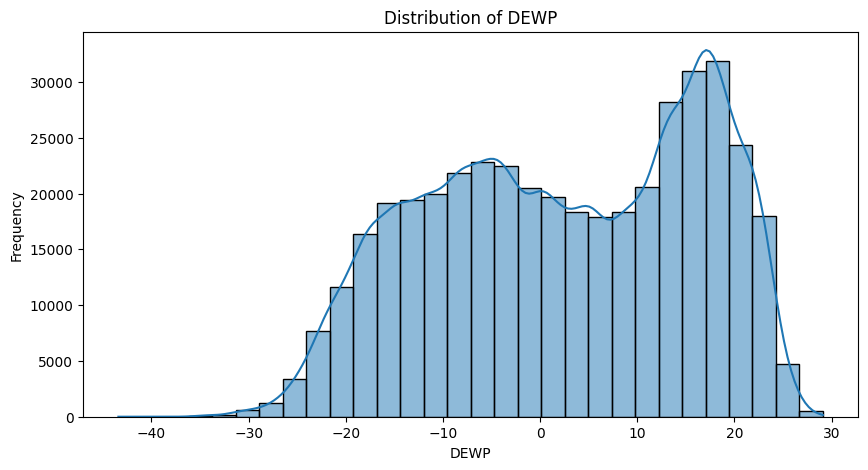

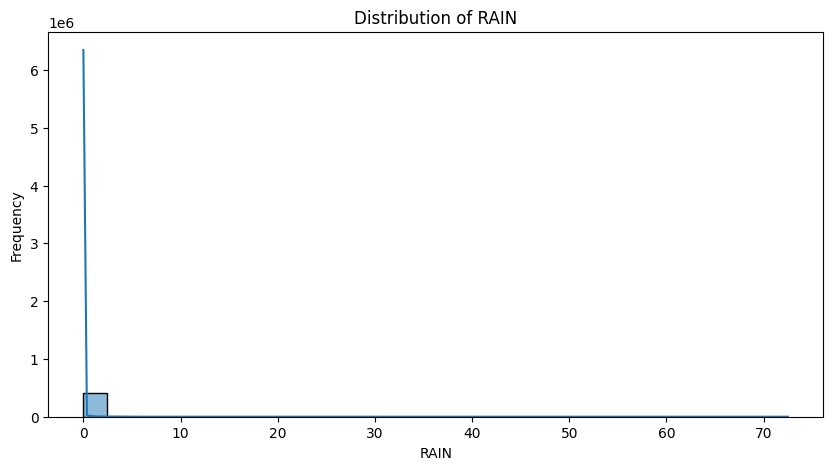

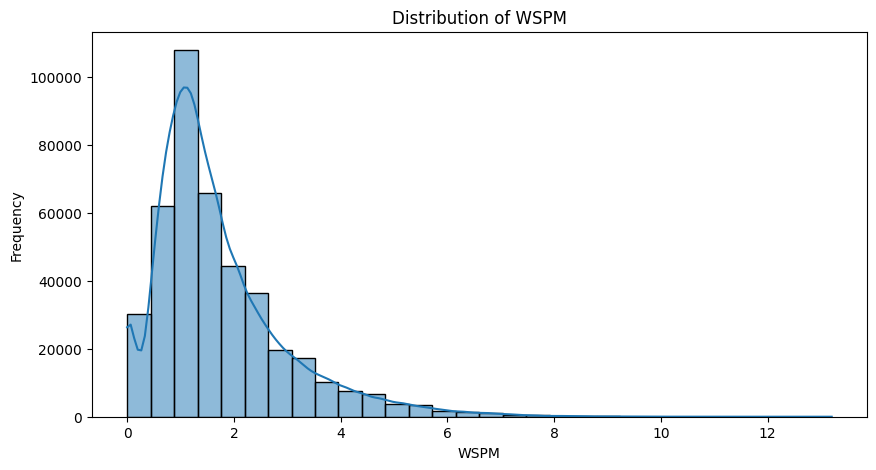

In [15]:
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

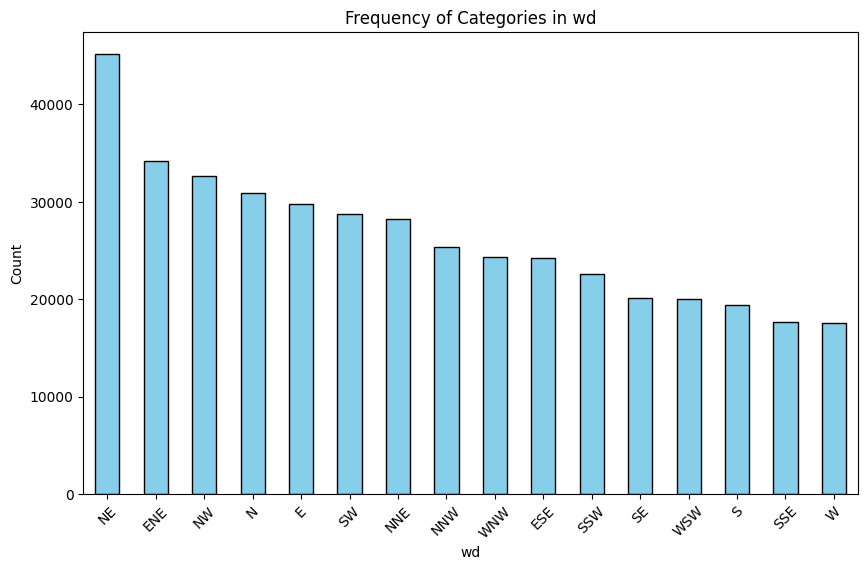

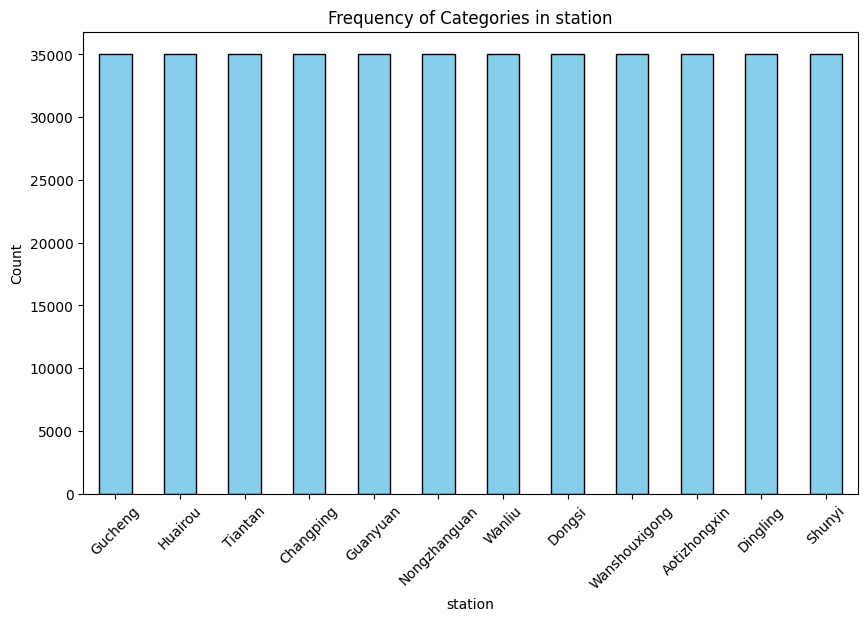

In [16]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=["object"]).columns

# Plot bar charts for each categorical variable
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title(f"Frequency of Categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

#### Bivariate Analysis


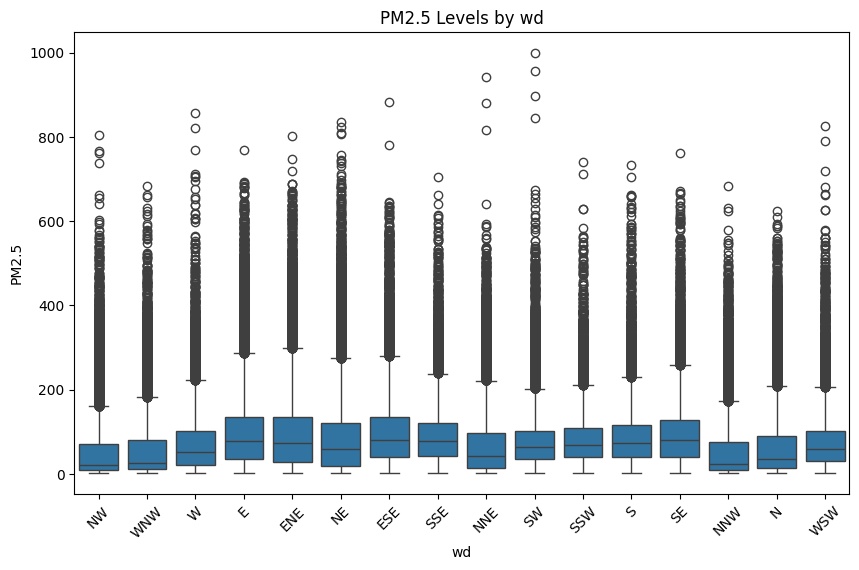

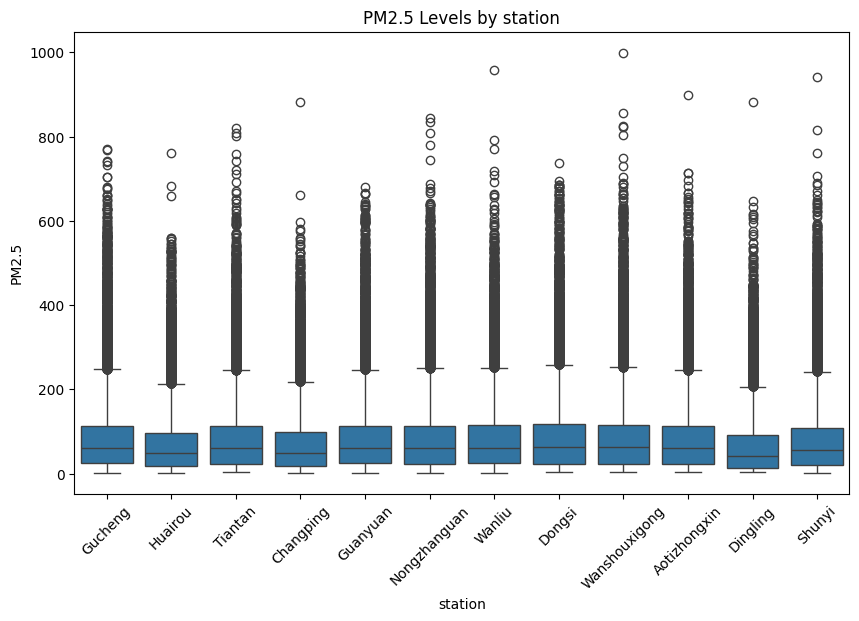

In [17]:
# Categorical vs. Target Variable
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=col, y="PM2.5")
    plt.title(f"PM2.5 Levels by {col}")
    plt.xticks(rotation=45)
    plt.show()

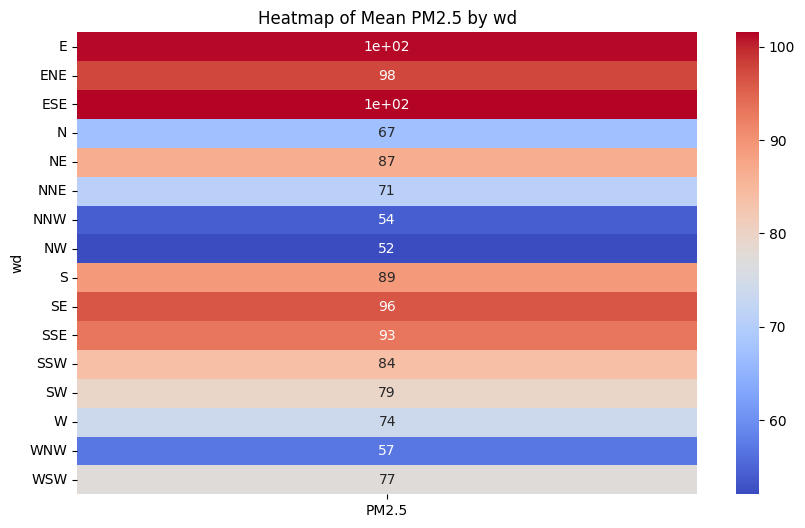

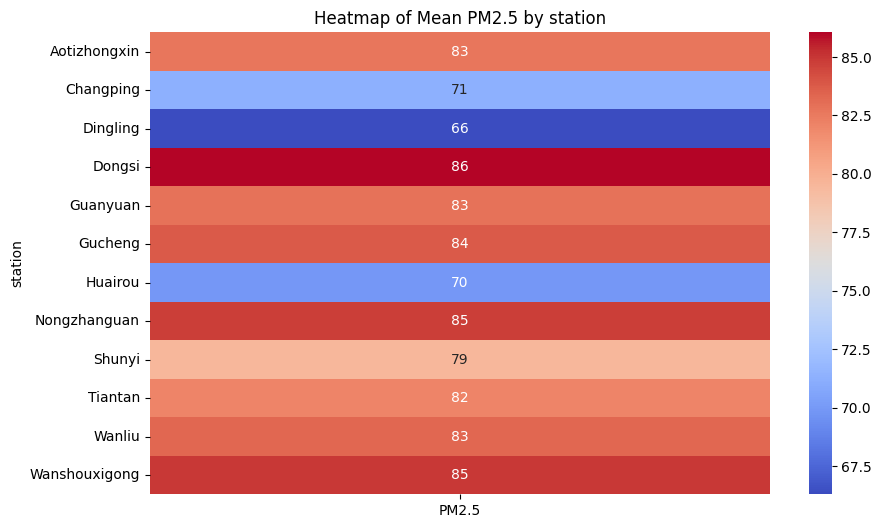

In [18]:
# Create pivot table for heatmap
for col in categorical_columns:
    pivot_table = df.pivot_table(index=col, values="PM2.5", aggfunc="mean")
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, cmap="coolwarm")
    plt.title(f"Heatmap of Mean PM2.5 by {col}")
    plt.show()

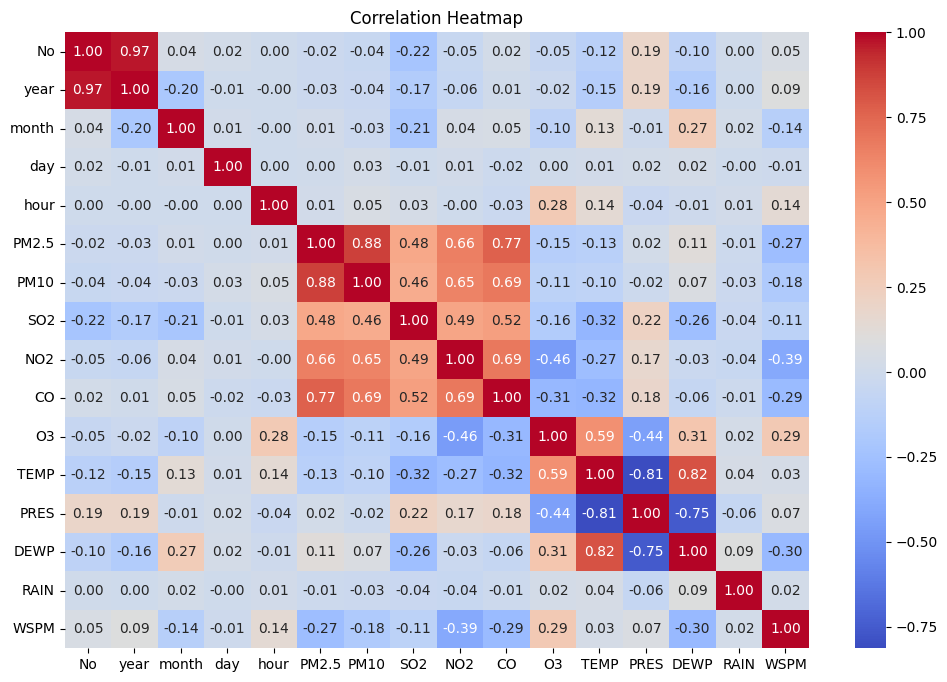

In [19]:
# Bivariate analysis: Correlation heatmap
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=["float64", "int64"])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

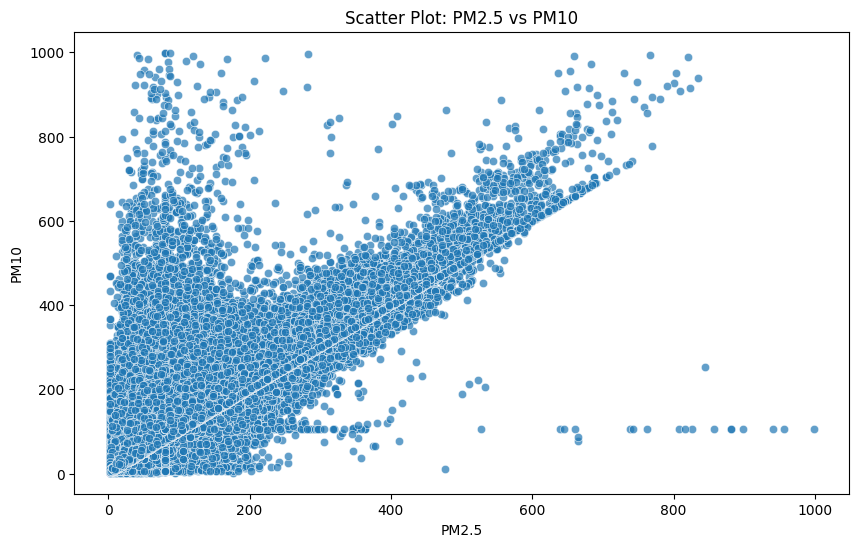

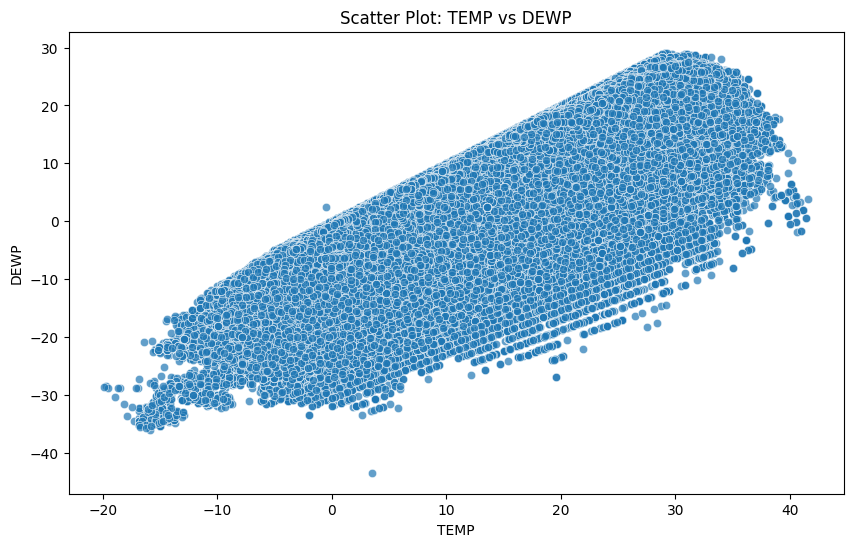

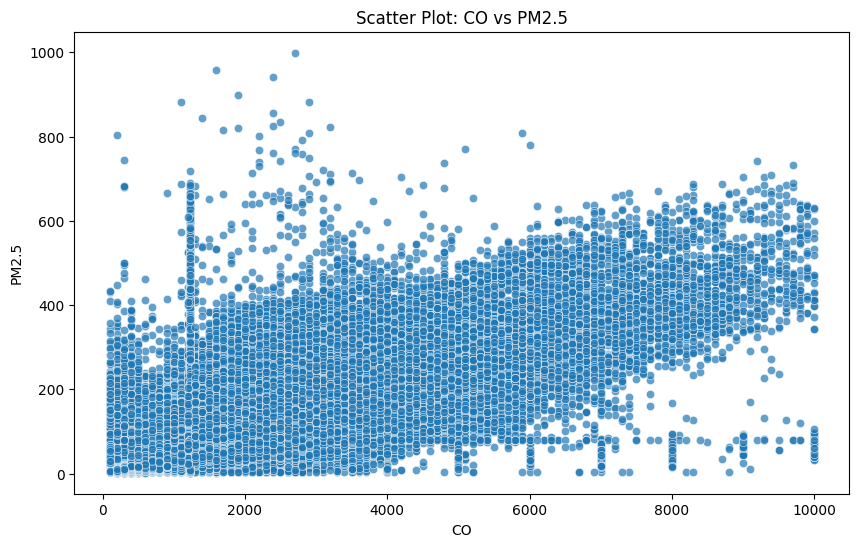

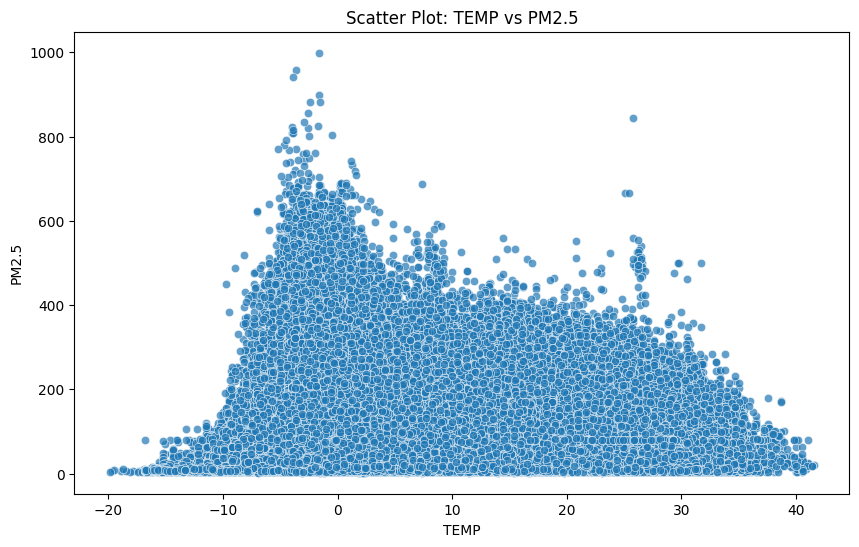

In [20]:
# Scatter plots for highly correlated variables
correlation_pairs = [
    ("PM2.5", "PM10"),
    ("TEMP", "DEWP"),
    ("CO", "PM2.5"),
    ("TEMP", "PM2.5"),
]

for x, y in correlation_pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x, y=y, alpha=0.7)
    plt.title(f"Scatter Plot: {x} vs {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

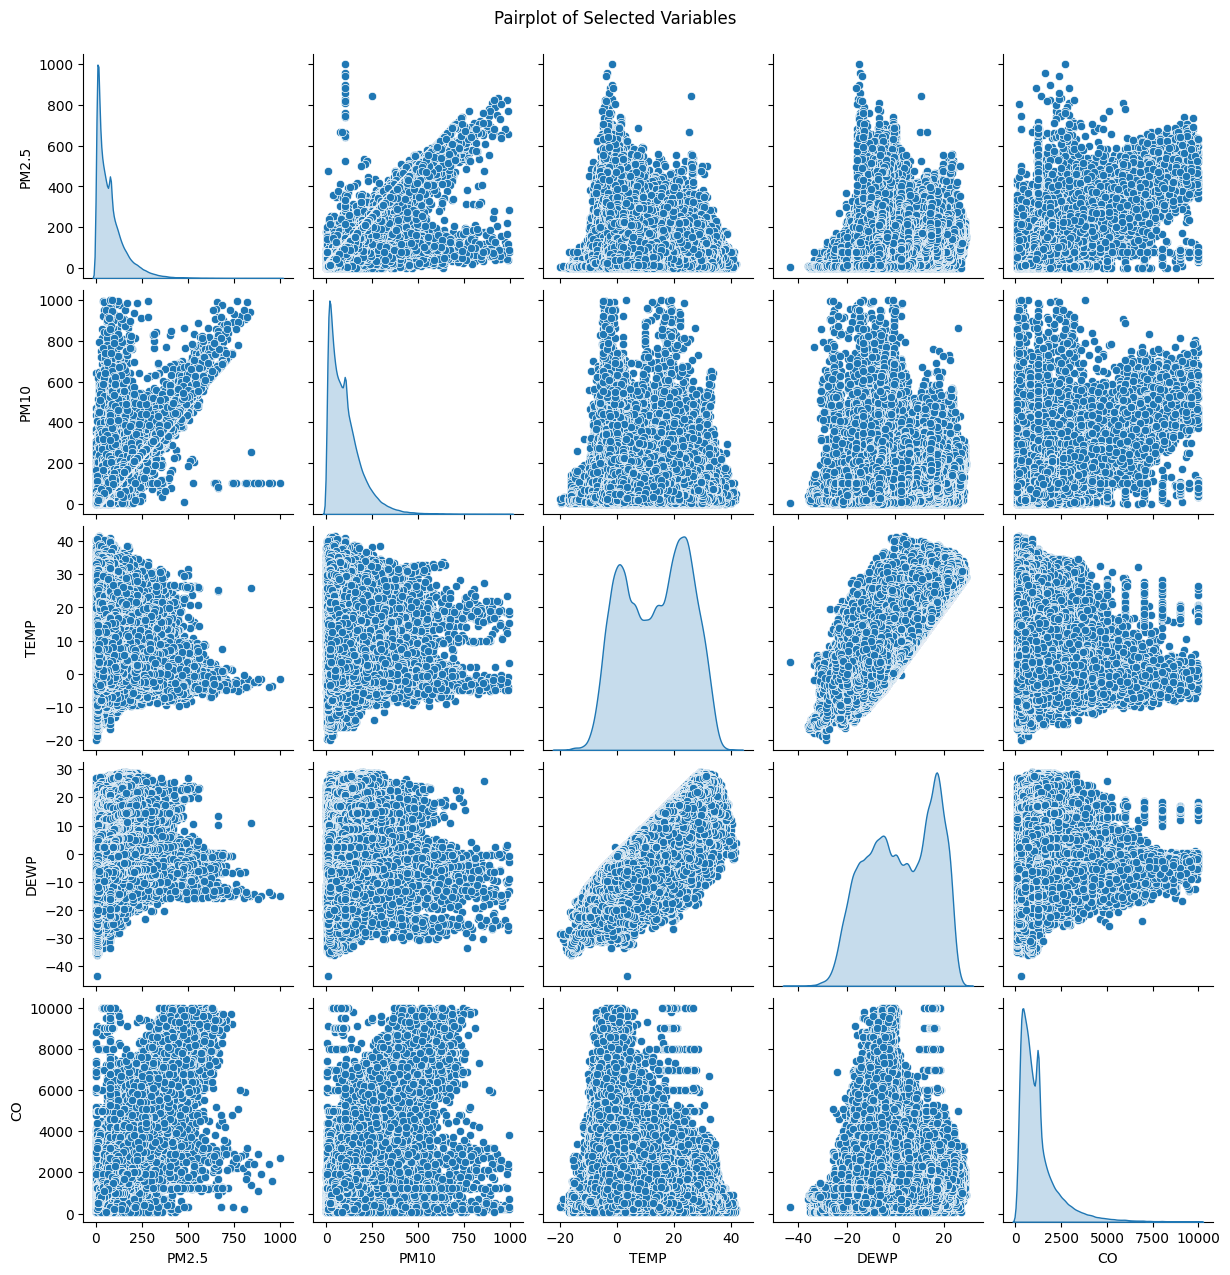

In [21]:
# Pairplot for selected variables
selected_columns = ["PM2.5", "PM10", "TEMP", "DEWP", "CO"]
sns.pairplot(df[selected_columns], diag_kind="kde")
plt.suptitle("Pairplot of Selected Variables", y=1.02)
plt.show()

## Model Building

In [22]:
# Define target variable and features
target = 'PM2.5'
X = df.drop(columns=[target])
y = df[target]

In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (336614, 17)
Testing set shape: (84154, 17)


In [24]:
# save test sets
X_test.to_csv("data/processed/X_test.csv", index=False)
y_test.to_csv("data/processed/y_test.csv", index=False)

In [25]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print("Numerical Features:", numerical_features.tolist())
print("Categorical Features:", categorical_features.tolist())

Numerical Features: ['No', 'year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
Categorical Features: ['wd', 'station']


In [26]:
# Preprocessing pipelines
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [27]:
def evaluate_and_save_best_model(X_train, X_test, y_train, y_test):
    from joblib import dump
    
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(random_state=42),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42),
        "K-Nearest Neighbors": KNeighborsRegressor()
    }
    
    results = []
    best_model = None
    best_model_name = None
    best_r2 = float('-inf')  # Initialize with a very low R² score

    for model_name, model in models.items():
        # Define a pipeline with preprocessing and the model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        
        # Fit the model
        pipeline.fit(X_train, y_train)
        
        # Make predictions
        y_pred = pipeline.predict(X_test)
        
        # Evaluate performance
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results.append({
            "Model": model_name,
            "MSE": mse,
            "R²": r2
        })
        
        print(f"{model_name}: MSE = {mse:.2f}, R² = {r2:.2f}")
        
        # Track the best model
        if r2 > best_r2:
            best_r2 = r2
            best_model = pipeline
            best_model_name = model_name

    # Save the best model
    if best_model:
        dump(best_model, f'models/best_model.pkl')
        print(f"Best model ({best_model_name}) saved as 'best_model_{best_model_name.replace(' ', '_').lower()}.pkl'")

    # Convert results to a DataFrame for better visualization
    results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
    return results_df, best_model_name

In [28]:
# Evaluate models and save the best one
results_df, best_model_name = evaluate_and_save_best_model(X_train, X_test, y_train, y_test)

# Display the results
print("\nModel Comparison:")
print(results_df)

# Display the best model name
print(f"\nThe best model is: {best_model_name}")

Linear Regression: MSE = 1024.48, R² = 0.84
Random Forest: MSE = 288.65, R² = 0.96
Decision Tree: MSE = 621.76, R² = 0.90
Gradient Boosting: MSE = 636.35, R² = 0.90
K-Nearest Neighbors: MSE = 475.94, R² = 0.93
Best model (Random Forest) saved as 'best_model_random_forest.pkl'

Model Comparison:
                 Model          MSE        R²
1        Random Forest   288.647758  0.955050
4  K-Nearest Neighbors   475.944663  0.925883
2        Decision Tree   621.755459  0.903177
3    Gradient Boosting   636.352002  0.900904
0    Linear Regression  1024.484482  0.840462

The best model is: Random Forest


In [29]:
results_df.to_csv("models/model_comparison.csv", index = False)  

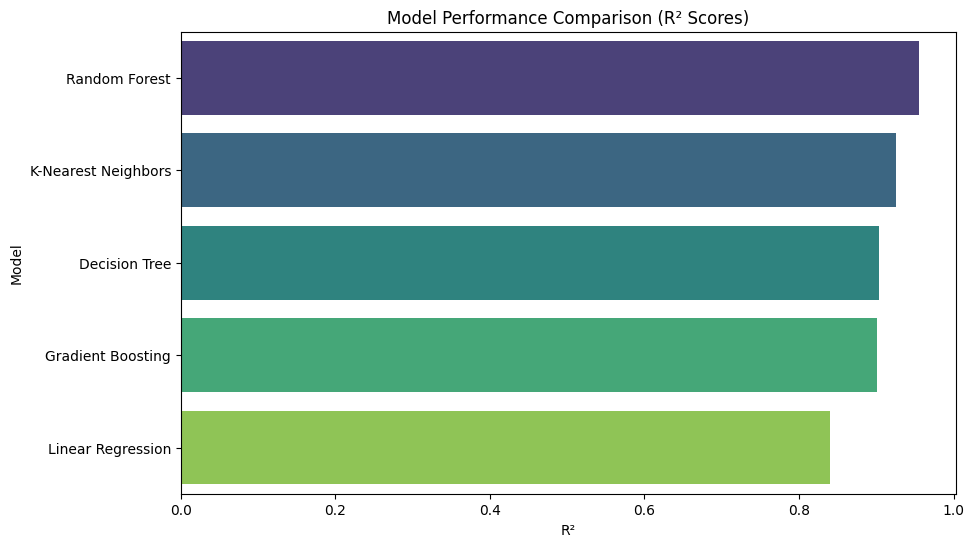

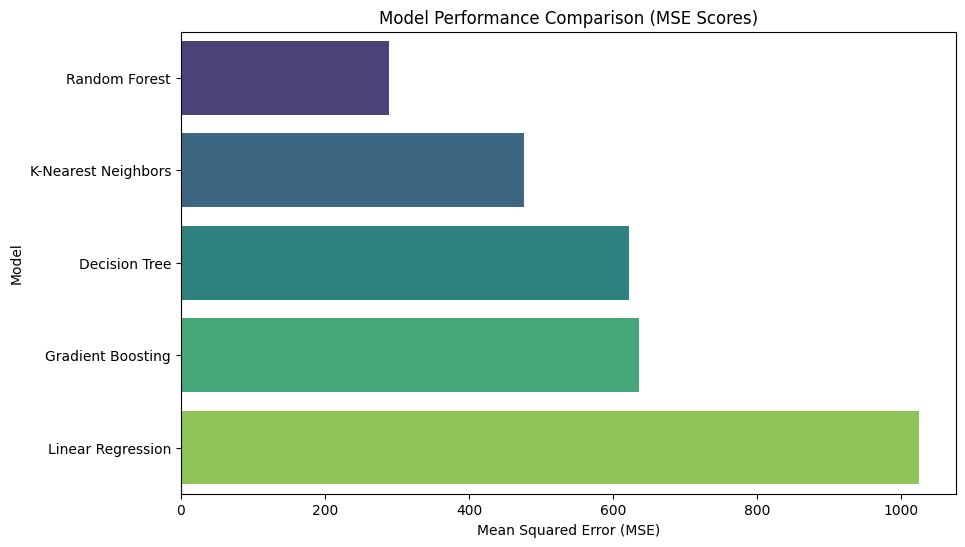

In [30]:
# Plot R² Scores
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="R²", y="Model", palette="viridis")
plt.title("Model Performance Comparison (R² Scores)")
plt.xlabel("R²")
plt.ylabel("Model")
plt.show()

# Plot MSE Scores
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="MSE", y="Model", palette="viridis")
plt.title("Model Performance Comparison (MSE Scores)")
plt.xlabel("Mean Squared Error (MSE)")
plt.ylabel("Model")
plt.show()